# 6. What rewards and penalties do validators receive as incentives?

In [1]:
import copy
import logging
import setup
import visualizations as visualizations
import experiments.templates.state_space as state_space_template

from experiments.run import run

time: 1.71 s (started: 2021-05-28 10:28:32 +02:00)


In [2]:
visualizations.inspect_module(state_space_template)

from model.types import Phase
import model.constants as constants
import model.simulation_configuration as simulation_configuration
from model.processes import create_stochastic_process_realizations
from model.types import Phase
from experiments.base import experiment


DELTA_TIME = constants.epochs_per_day  # epochs per timestep
SIMULATION_TIME_MONTHS = 12 * 5  # number of months
TIMESTEPS = constants.epochs_per_month * SIMULATION_TIME_MONTHS // DELTA_TIME

# Generate stochastic process realizations
stochastic_process_realizations = create_stochastic_process_realizations(TIMESTEPS, DELTA_TIME)
eth_price_samples = stochastic_process_realizations['eth_price_samples']

parameter_overrides = {
    "phase": [Phase.ALL],
    "eth_price_process": [lambda run, timestep: eth_price_samples[run - 1][timestep]],
}

experiment.simulations[0].timesteps = TIMESTEPS
# Override base experiment System Parameters
experiment.simulations[0].model.params.update(parameter_overrides)

time: 98.1 ms (started: 2021-05-28 10:28:34 +02:00)


In [3]:
df, exceptions = run(state_space_template.experiment)

2021-05-28 10:28:34,288 - root - INFO - Running experiment
2021-05-28 10:28:34,389 - root - INFO - Starting simulation 0 / run 0 / subset 0
2021-05-28 10:28:39,118 - root - INFO - Experiment complete
time: 6.01 s (started: 2021-05-28 10:28:34 +02:00)


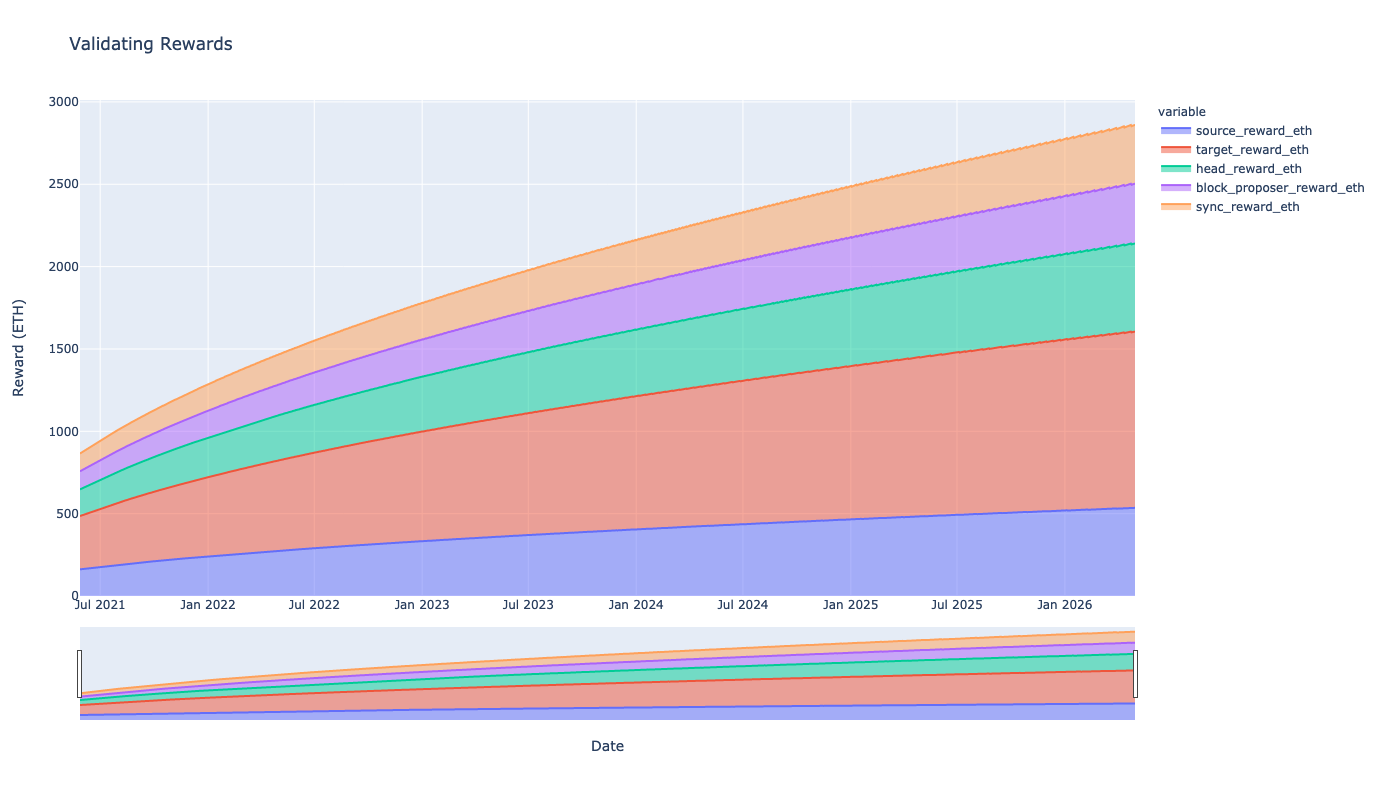

time: 833 ms (started: 2021-05-27 13:07:32 +02:00)


In [12]:
fig = visualizations.plot_validating_rewards(df)
fig.show()
pio.write_image(fig, "../outputs/validating_rewards.png", width=1080, height=720)

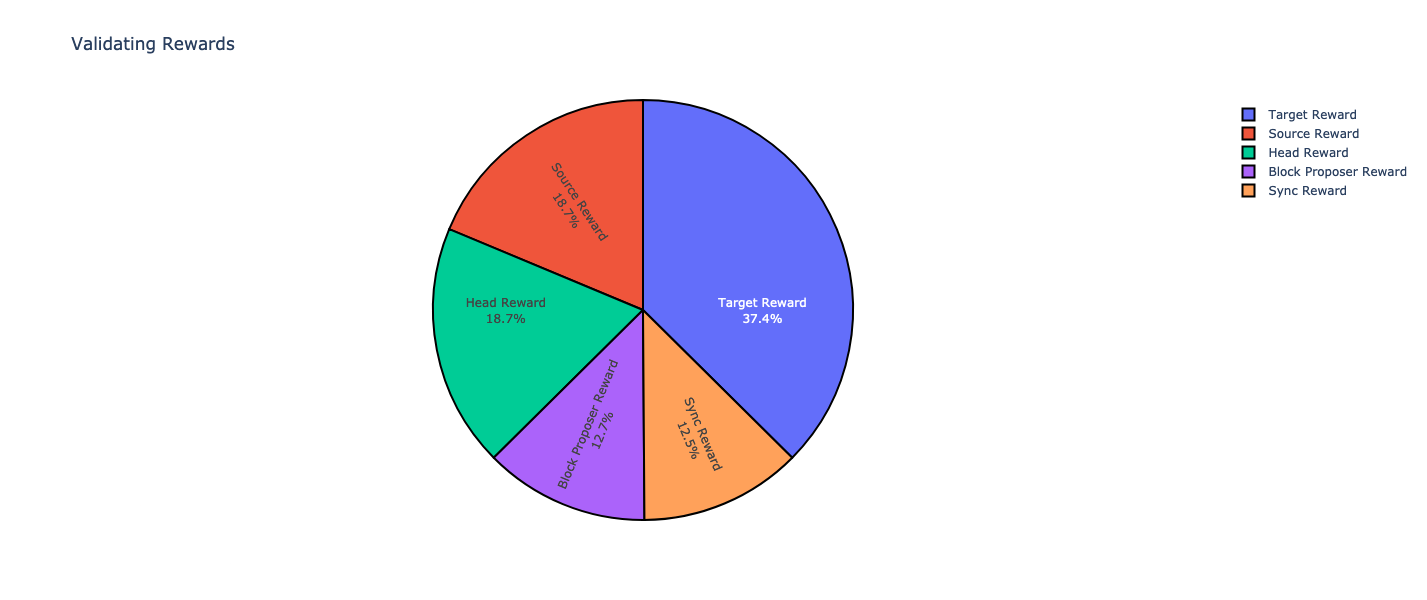

time: 106 ms (started: 2021-05-27 13:08:08 +02:00)


In [14]:
visualizations.plot_validating_rewards_pie_chart(df)

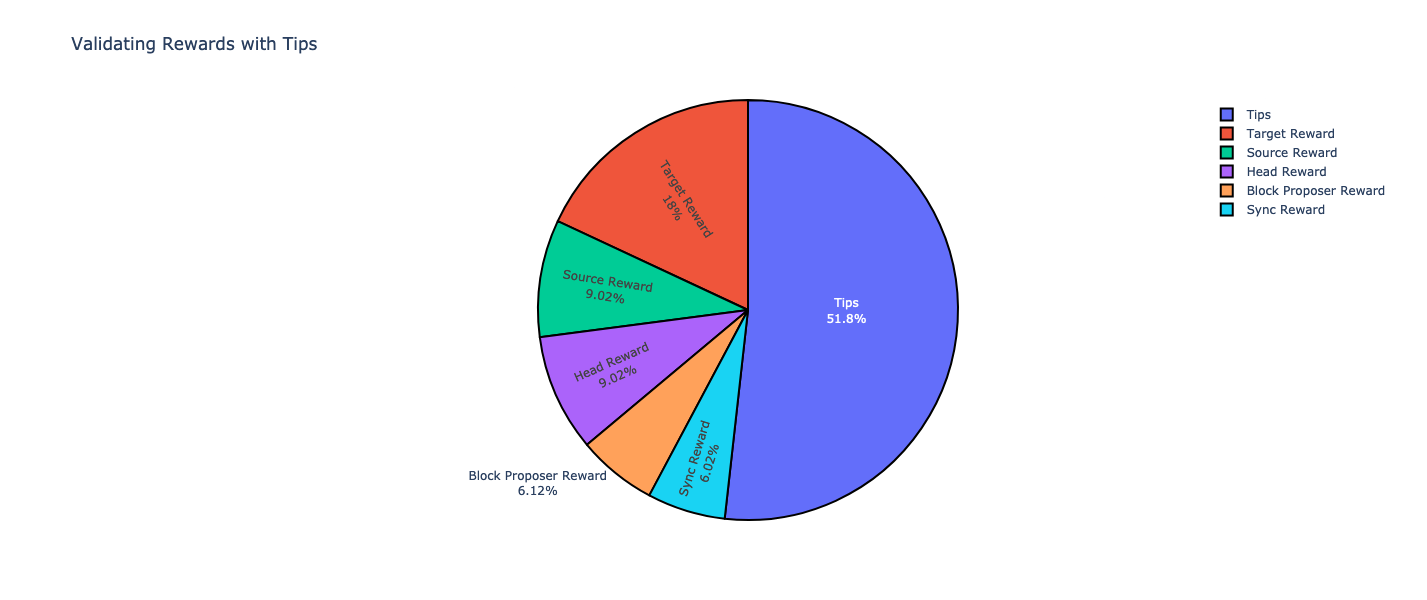

time: 78.9 ms (started: 2021-05-27 13:08:11 +02:00)


In [15]:
visualizations.plot_validating_rewards_pie_chart(df, with_tips=True)